In [1]:
import pandas_datareader as pdr
key="ed6cdc244eb5225b180d3c438b280cec2ffb21e7"

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-11 00:00:00+00:00,102.26,102.28,101.50,102.24,27408237,23.774094,23.778743,23.597404,23.769444,109632948,0.0,1.0
1,AAPL,2016-03-14 00:00:00+00:00,102.52,102.91,101.78,101.91,25076062,23.834540,23.925210,23.662500,23.692723,100304248,0.0,1.0
2,AAPL,2016-03-15 00:00:00+00:00,104.58,105.18,103.85,103.96,40067734,24.313463,24.452955,24.143748,24.169321,160270936,0.0,1.0
3,AAPL,2016-03-16 00:00:00+00:00,105.97,106.31,104.59,104.61,38303493,24.636619,24.715665,24.315788,24.320437,153213972,0.0,1.0
4,AAPL,2016-03-17 00:00:00+00:00,105.80,106.47,104.96,105.52,34420705,24.597097,24.752863,24.401808,24.532000,137682820,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-03-03 00:00:00+00:00,122.060,125.710,121.84,124.81,112966340,122.060,125.710,121.84,124.81,112966340,0.0,1.0
1253,AAPL,2021-03-04 00:00:00+00:00,120.130,123.600,118.62,121.75,178154975,120.130,123.600,118.62,121.75,178154975,0.0,1.0
1254,AAPL,2021-03-05 00:00:00+00:00,121.420,121.935,117.57,120.98,153766601,121.420,121.935,117.57,120.98,153766601,0.0,1.0
1255,AAPL,2021-03-08 00:00:00+00:00,116.360,121.000,116.21,120.93,154376610,116.360,121.000,116.21,120.93,154376610,0.0,1.0
1256,AAPL,2021-03-09 00:00:00+00:00,121.085,122.060,118.79,119.03,129525780,121.085,122.060,118.79,119.03,129525780,0.0,1.0


In [6]:
df1=df.reset_index()['close']

In [7]:
df1

0       102.260
1       102.520
2       104.580
3       105.970
4       105.800
         ...   
1252    122.060
1253    120.130
1254    121.420
1255    116.360
1256    121.085
Name: close, Length: 1257, dtype: float64

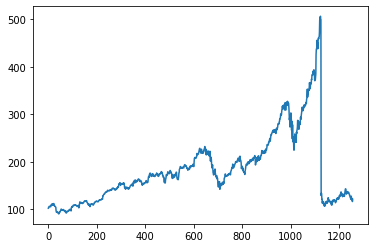

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.02867108],
       [0.02929645],
       [0.03425135],
       ...,
       [0.07475646],
       [0.06258569],
       [0.07395069]])

In [12]:
#spliting the data into train and test data
training_size=int(len(df1)*0.65)
test_size= len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(817, 440)

In [14]:
train_data

array([[0.02867108],
       [0.02929645],
       [0.03425135],
       [0.03759471],
       [0.03718581],
       [0.03747444],
       [0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.010

In [15]:
##convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+ time_step, 0])
  return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 287ms/step - loss: 0.0167 - val_loss: 0.0536
Epoch 2/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0031 - val_loss: 0.0261
Epoch 3/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0014 - val_loss: 0.0254
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 6.0648e-04 - val_loss: 0.0215
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 4.8105e-04 - val_loss: 0.0214
Epoch 6/100
12/12 [==============================] - 2s 185ms/step - loss: 4.1684e-04 - val_loss: 0.0203
Epoch 7/100
12/12 [==============================] - 2s 184ms/step - loss: 4.0556e-04 - val_loss: 0.0197
Epoch 8/100
12/12 [==============================] - 2s 184ms/step - loss: 4.0324e-04 - val_loss: 0.0191
Epoch 9/100
12/12 [==============================] - 2s 188ms/step - loss: 3.5595e-04 - val_loss: 0.0186
Epoch 10/100
12/12 [==============================] - 2s 193ms/step

In [24]:
import tensorflow as tf

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.43601246953864

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

256.2973520908852

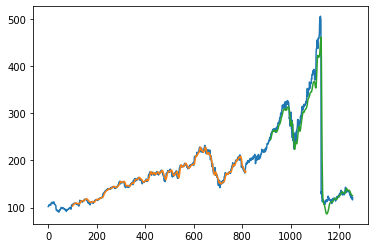

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

440

In [33]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.07420324714371618,
 0.07304870715574258,
 0.06898376428141911,
 0.061671677690920024,
 0.06535177390258567,
 0.06381238725195432,
 0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.0922669873

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08052952]
101
1 day input [0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372
 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194
 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237
 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:

len(df1)

1257

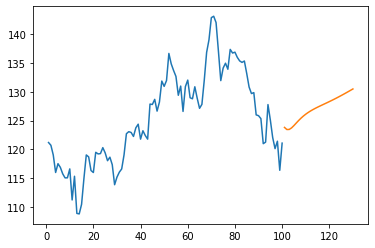

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

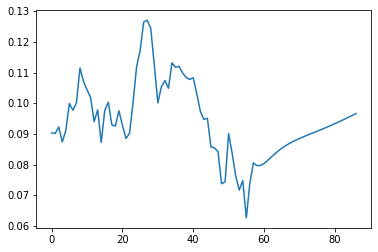

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

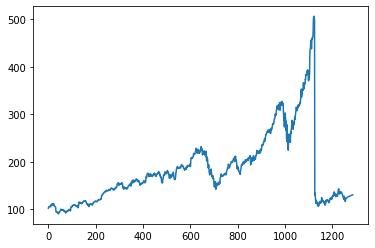

In [42]:
plt.plot(df3)